In [1]:
# compare_countries.ipynb (Step-by-step Jupyter cells)

# ----------------------------
# 📦 Step 1: Import Libraries
# ----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_utils import load_data



In [3]:
# ----------------------------
# 📂 Step 2: Load Cleaned Data
# ----------------------------
benin = load_data("data/benin_clean.csv")
sierra_leone = load_data("data/sierraleone_clean.csv")
togo = load_data("data/togo_clean.csv")

benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

combined_df = pd.concat([benin, sierra_leone, togo], ignore_index=True)



In [4]:
# ----------------------------
# 📊 Step 3: Summary Statistics Table
# ----------------------------
summary = combined_df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
display(summary)



GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

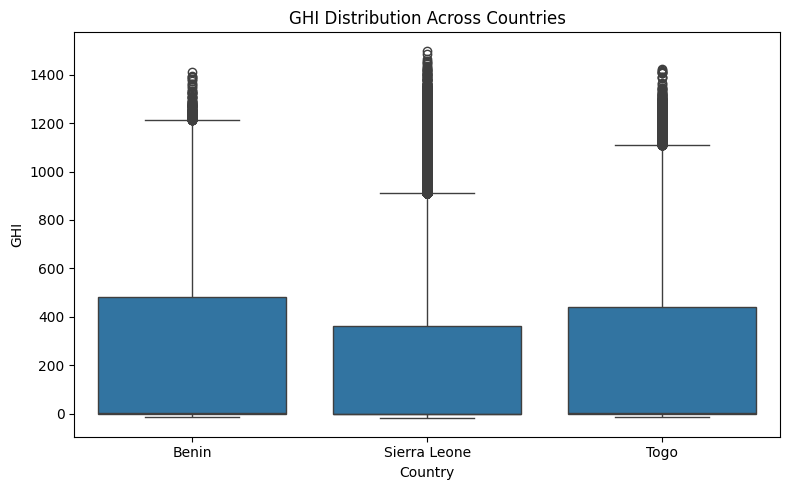

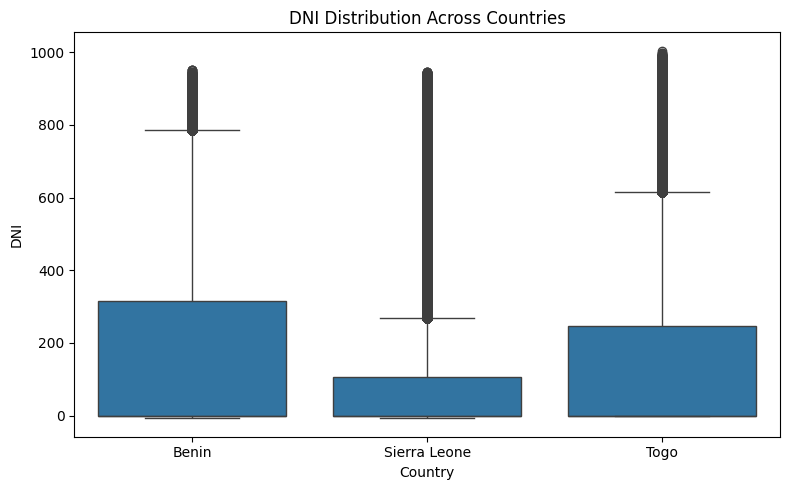

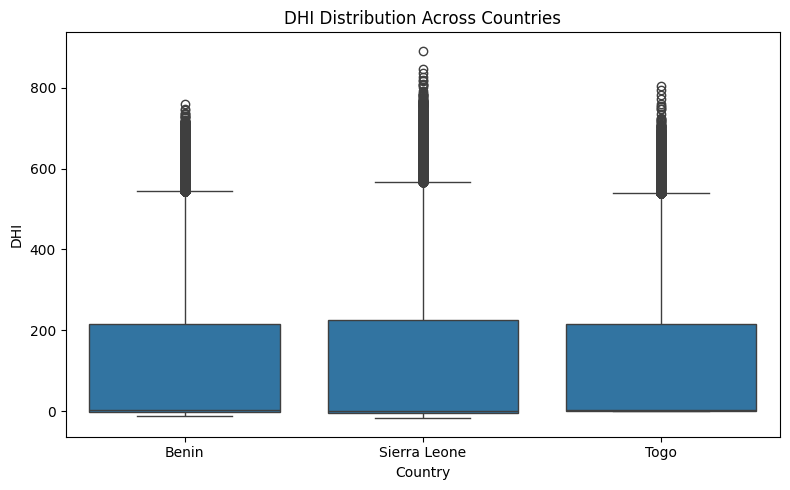

In [5]:

# ----------------------------
# 📈 Step 4: Boxplots by Metric
# ----------------------------
metrics = ["GHI", "DNI", "DHI"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=combined_df, x="Country", y=metric)
    plt.title(f"{metric} Distribution Across Countries")
    plt.xlabel("Country")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()



In [6]:
# ----------------------------
# 📐 Step 5 (Optional): One-way ANOVA for GHI
# ----------------------------
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(
    benin["GHI"],
    sierra_leone["GHI"],
    togo["GHI"]
)

print(f"ANOVA for GHI: F = {f_stat:.2f}, p = {p_val:.4f}")



ANOVA for GHI: F = 2090.09, p = 0.0000


# ----------------------------
# 📝 Step 6: Key Observations (Markdown Cell)
# ----------------------------
# 1. Benin has the highest average and median GHI, suggesting strong potential for solar investment.
# 2. Sierra Leone shows wider variability in GHI and DNI, which might imply more inconsistent solar availability.
# 3. Togo generally exhibits lower solar irradiance metrics, which may limit solar farm output compared to the others.



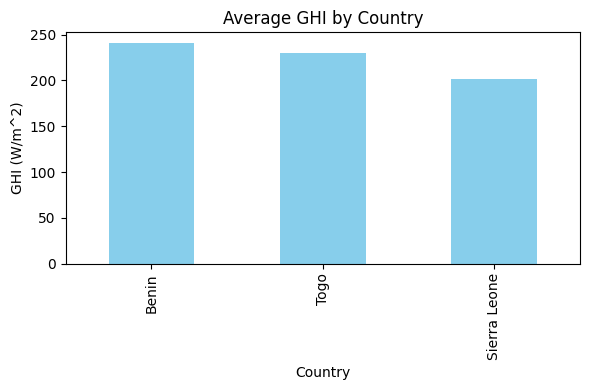

In [7]:
# ----------------------------
# 📊 Step 7 (Bonus): Bar chart for Average GHI
# ----------------------------
avg_ghi = combined_df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
avg_ghi.plot(kind='bar', color='skyblue')
plt.title("Average GHI by Country")
plt.ylabel("GHI (W/m^2)")
plt.tight_layout()
plt.show()